# Application in Problems

The Thermodynamic Module which we created can also have an application in dealing with text-book problems. Let's solve a few of them to understand the process.

In [1]:
from thermodynamics_logic import *

## Unit Conversion

In [2]:
# Pressure
Pa = N = m = 1
MPa = (10**6) * Pa
kPa = (10**3) * Pa
bar = (10**5) * Pa
atm = 101325 * Pa
# Volume
m3 = 1
L = 0.001 * m3
mL = cc = 1/1000 * L

## Problem 1
In a process, initial pressure and temperature are and 445 kPa and 38ºC and final pressure and temperature are 24 bar and -128ºC, then the approximate value of polytropic index "n".

**(Sample Problem)**

The process follows the rule p*V^0.69 = 12865.38 (constant)
Hence, 'n' for the given process is 0.69


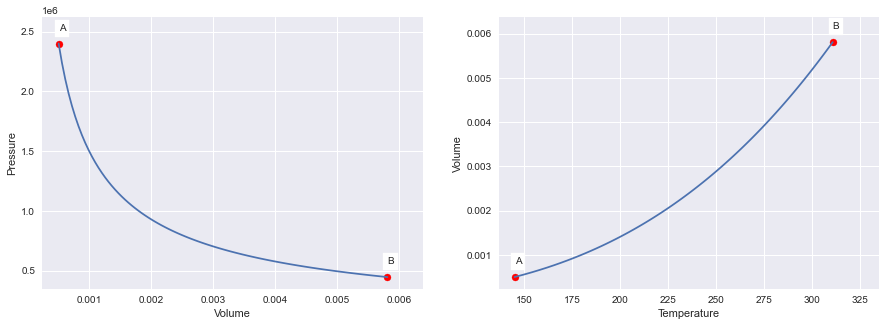

In [3]:
A = StateVariable(pressure=445*kPa,temperature=38+273)
B = StateVariable(pressure=24*bar,temperature=-128+273)

process = TherodynamicProcess.PolyIsotropicProcess(A,B)
TherodynamicProcess.plot(process.coordinates())
print(f"The process follows the rule p*V^{process.y:.2f} = {process.k:.2f} (constant)")
print(f"Hence, 'n' for the given process is {process.y:.2f}")

## Problem 2

A frictionless piston-cylinder device contains a gas initially at 0.8 MPa and 0.015 m<sup>3</sup>. It expands quasi-statically at constant temperature to a final volume of 0.030 m<sup>3</sup>. What will be the work output (in kJ) during this process?

**(Source : DTU Semester 01, BME, Minor Test)**

Work done for the given process is 8.318 kJ


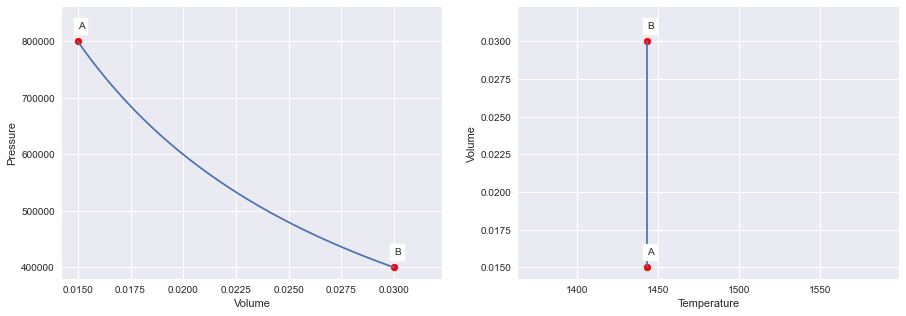

In [4]:
A = StateVariable(pressure=0.8*MPa,volume=0.015*m3)
B = StateVariable(volume=0.030*m3)

process = TherodynamicProcess.IsothermalReversible(A,B)
TherodynamicProcess.plot(process.coordinates())
print(f"Work done for the given process is {-process.stats()['w']/1000:.3f} kJ")

## Problem 3
An Engine cylinder has a piston of area 0.12m<sup>2</sup> and contains gas at a pressure of 1.5MPa the gas expands according to a process, which is represented by a straight line on a pressure volume diagram. The final pressure is 0.15MPa. Calculate the work done by the gas on the piston if the stroke is 0.30m.

**(Source : PK Nag)**

Work done in the process = 29.70 kJ


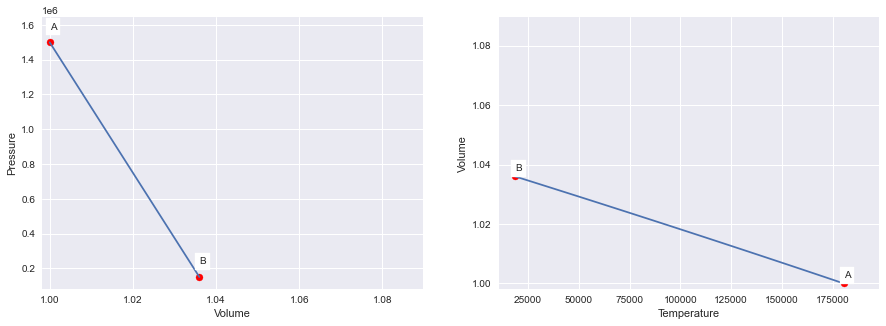

In [5]:
v = 1 # (unknown)
A = StateVariable(pressure=1.5*MPa, volume=v*m3)
B = StateVariable(pressure=0.15*MPa, volume=(A.volume+0.12*0.30)*m3)

process = TherodynamicProcess.DefineRulePV()
process.initialize_linear(A,B)

TherodynamicProcess.plot(process.coordinates(A,B))
print(f"Work done in the process = {-process.stats(A,B)['w']/1000:.2f} kJ")

## Problem 4
A mass of 1.5kg of air is compressed in a quasi static process from 0.1Mpa to 0.7Mpa for which PV = constant. The initial density of air is 1.16kg/m3. Find the work done by the piston to compress the air.

**(Source : PK Nag)**

Work done by the piston = 251.63 kJ


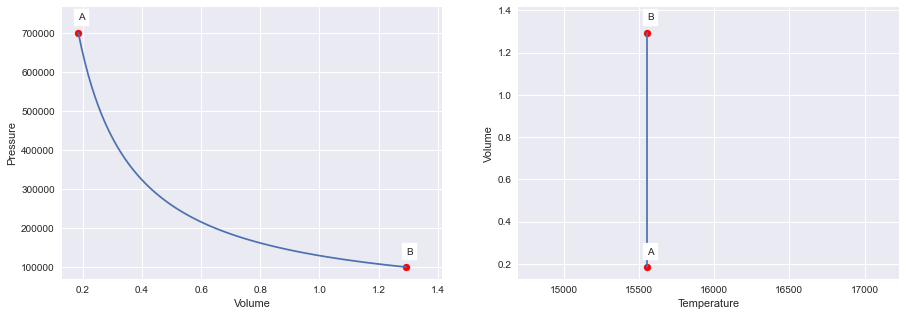

In [6]:
mass = 1.5
density = 1.16
A = StateVariable(pressure=0.1*MPa, volume=mass/density*m3)
B = StateVariable(pressure=0.7*MPa)

process = TherodynamicProcess.IsothermalReversible(A,B)

TherodynamicProcess.plot(process.coordinates())
print(f"Work done by the piston = {process.stats()['w']/1000:.2f} kJ")

## Problem 5
A mass of gas is compressed in a quasi-static process from 80 kPa, 0.1 m<sup>3</sup> to 0.4 MPa, 0.03 m<sup>3</sup>.

Assuming that the pressure and volume are related by
**pv<sup>n</sup> = constant**

Find the work done by the gas system.

**(Source : PK Nag)**

The process follows the rule p*V^1.34 = 3683.98 (constant)
Work done by the gas in the following process = -11.88 kJ


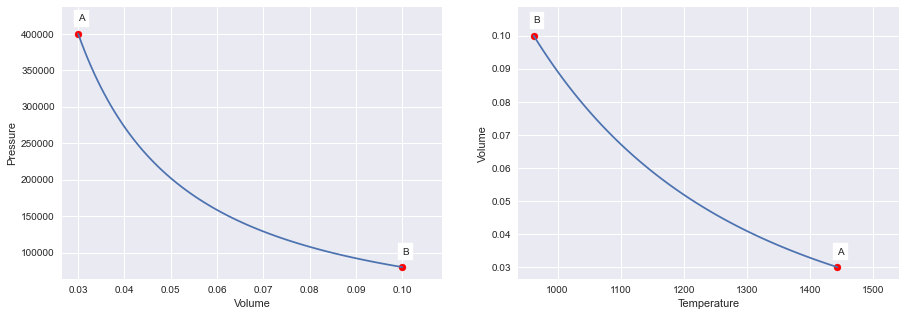

In [7]:
A = StateVariable(pressure=80*kPa, volume=0.1*m3)
B = StateVariable(pressure=0.4*MPa, volume=0.03*m3)

process = TherodynamicProcess.PolyIsotropicProcess(A,B)
TherodynamicProcess.plot(process.coordinates())
print(f"The process follows the rule p*V^{process.y:.2f} = {process.k:.2f} (constant)")
print(f"Work done by the gas in the following process = {-process.stats()['w']/1000:.2f} kJ")

## Problem 6
If a gas of volume 6000 cm<sup>3</sup> and at pressure of 100 kPa is compressed quasistatically according to **pV<sup>2</sup>= constant** until the volume becomes 2000 cm<sup>3</sup>, determine the final pressure and the work transfer.

**(Source : PK Nag)**

The process follows the rule p*V^2 = 3.60 (constant)
Work done by the gas in the following process = -1.20 kJ


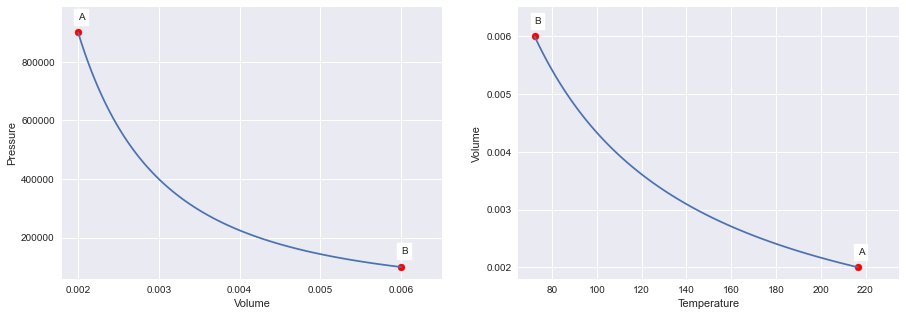

In [8]:
A = StateVariable(pressure=100*kPa, volume=6000*cc)
B = StateVariable(volume=2000*cc)

process = TherodynamicProcess.PolyIsotropicProcess(A,B,2)
TherodynamicProcess.plot(process.coordinates())

print(f"The process follows the rule p*V^{process.y} = {process.k:.2f} (constant)")
print(f"Work done by the gas in the following process = {-process.stats()['w']/1000:.2f} kJ")

## Problem 7
A stationary mass of gas is compressed without friction from an initial state of 0.3 m<sup>3</sup> and 0.105 MPa to a final state of 0.15 m<sup>3</sup> and 0.105M Pa. The pressure remaining constant. During the process there is a transfer of 37.6 kJ of heat from the system. How much does the internal energy of the gas change?

**(Source : PK Nag)**

W = -15.75 kJ
Q = -37.60 kJ
U = Q - W = -21.85 kJ


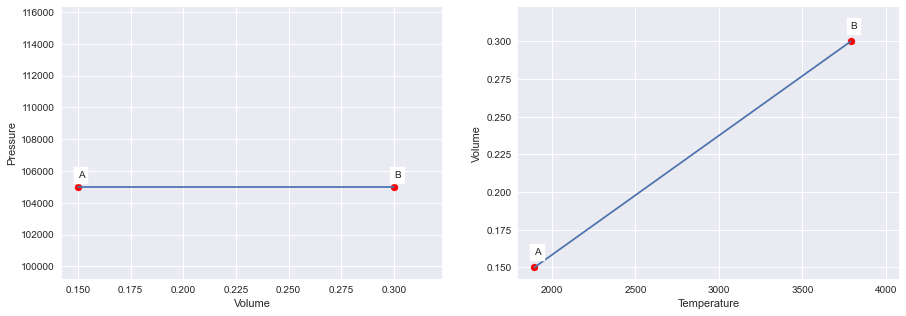

In [9]:
A = StateVariable(pressure=0.105*MPa, volume=0.3*m3)
B = StateVariable(pressure=0.105*MPa, volume=0.15*m3)
Q = -37.6
process = TherodynamicProcess.IsobaricProcess(A,B)
TherodynamicProcess.plot(process.coordinates(A,B))

print(f"W = {-process.stats(A,B)['w']/1000:.2f} kJ")
print(f"Q = {Q:.2f} kJ")
print(f"U = Q - W = {(Q-(-process.stats(A,B)['w']/1000)):.2f} kJ")

## Problem 8
One mole of a monoatomic gas is heated at a constant pressure of 1 atmosphere from 0K to 100K. Calculate the change in internal energy of the gas. (R = 8.3 J mol<sup>-1</sup> K<sup>-1</sup>)

**(Source : JEE Mains)**

Change in internal energy of the gas = 1.25 kJ


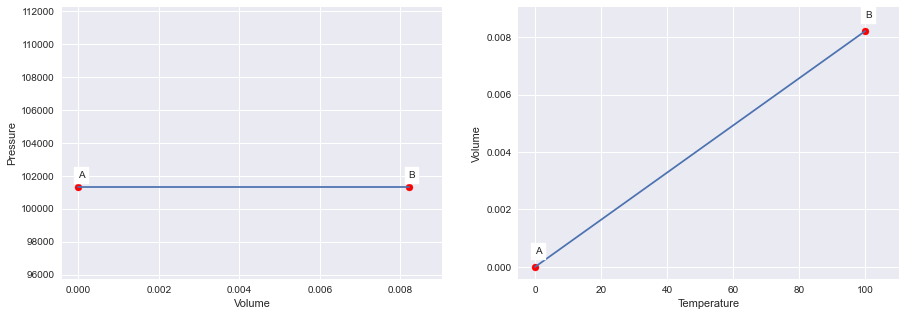

In [10]:
A = StateVariable(pressure=1*atm, temperature=0)
B = StateVariable(pressure=1*atm, temperature=100)

process = TherodynamicProcess.IsobaricProcess(A,B)

TherodynamicProcess.plot(process.coordinates(A,B))
print(f"Change in internal energy of the gas = {process.stats(A,B)['u']/1000:.2f} kJ")

## Problem 9
Calculate the heat given to the system when it is heated from 50°C to 75°C under isochoric conditions.

**(Source : JEE Mains)**

Heat given to the system = 311.77 Joules


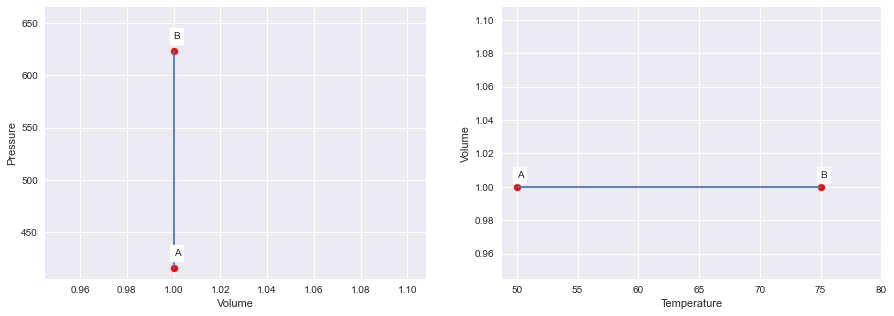

In [11]:
v = 1
a = StateVariable(temperature=50)
b = StateVariable(temperature=75)

process = TherodynamicProcess.IsochoricProcess(a,b,comman_volume=v)
TherodynamicProcess.plot(process.coordinates(a,b))

print(f"Heat given to the system = {process.stats(a,b)['q']:.2f} Joules")